# A hasse-diagramm layout for networkx

Hasse-diagramms are a usefull tool for the visualization of partially ordered sets.
I provide a simple toolset for their visualization using networkx.

In [3]:
import matplotlib.pyplot
import networkx

import hasseNetworkx

### Example: Sets are partially ordered by the subset relationship

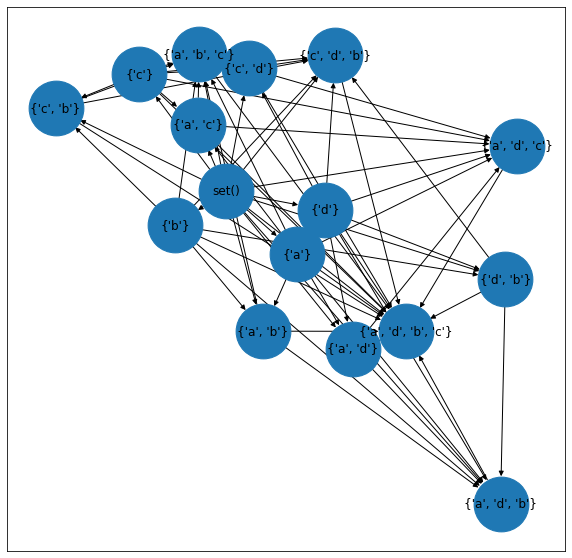

In [4]:
sets = [set(),
        set('a'), set('b'), set('c'), set('d'),
        set('ab'), set('ac'), set('ad'), set('bc'), set('bd'), set('cd'),
        set('abc'), set('abd'), set('acd'), set('bcd'),
        set('abcd')]
        
subset_relationships = [(str(s1),str(s2)) for s1 in sets for s2 in sets if ((s1 != s2) and (s1.issubset(s2)))]

Graph = networkx.DiGraph()
Graph.add_nodes_from([str(s) for s in sets])
Graph.add_edges_from(subset_relationships)

matplotlib.pyplot.figure(figsize=(10, 10))
networkx.draw_networkx(Graph, node_size=3000)
matplotlib.pyplot.show()

### Step 1: Removing edges where the relationship is implied by the transitivity of the partial order

Edges (u,v) where there exists a path from u to v with more than one node inbetween are removed

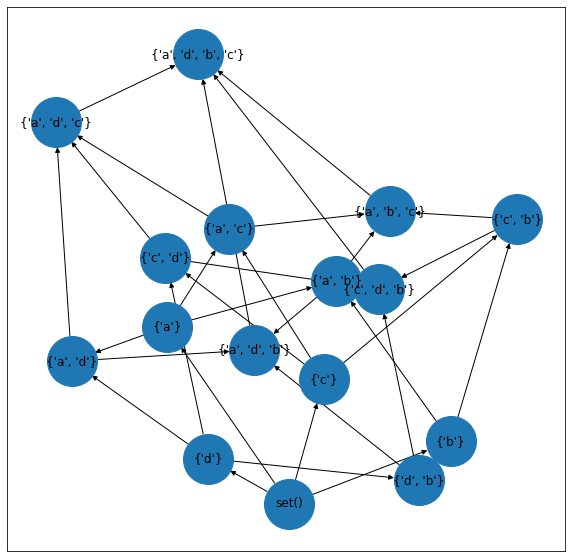

In [6]:
Graph = hasseNetworkx.transitivity_elimination(Graph)

matplotlib.pyplot.figure(figsize=(10, 10))
networkx.draw_networkx(Graph, node_size=2500)
matplotlib.pyplot.show()

### Step 2: Positioning of the nodes

The algorithm consists of two main steps:<br>
1. Determine y positions: Determining the layer of each node
2. Determine x positions: Spreading nodes on each layer with maximum distance<br><br>
Step 1 is realised by a recursive algorithm.<br> First, all nodes are positioned in layer 0.<br> In each step, all nodes v of the currently highest layer i are considered.<br> If there is another node u in layer i, such that an edge (u,v) exists in the graph, u is repositioned in layer i+1.

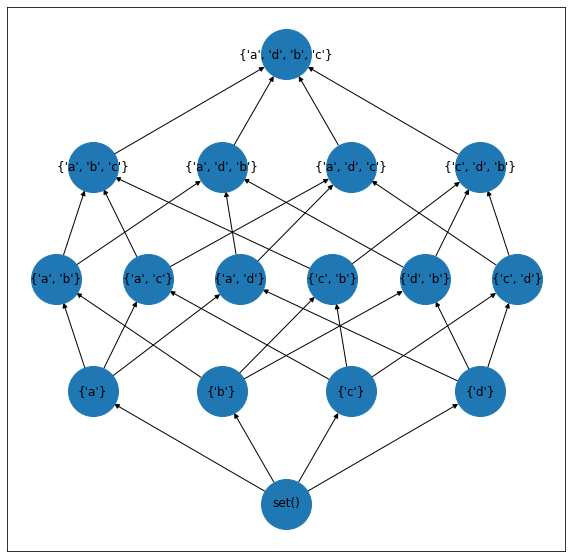

In [7]:
matplotlib.pyplot.figure(figsize=(10, 10))
networkx.draw_networkx(Graph, node_size=2500, pos=hasseNetworkx.layout(Graph))
matplotlib.pyplot.show()